In [8]:
from sklearn.cluster import AffinityPropagation
import os
import re
import sys
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from gensim import corpora, models
from nltk.corpus import wordnet
from nltk import word_tokenize, pos_tag
import traceback
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [6]:
# corpus_path = "/home/zy/Downloads/bbc news dataset"
corpus_path = "/Users/zhouyou/Downloads/bbc news dataset"
document_path = "/Users/zhouyou/Downloads/summ/2/docsent"
summ_path = "/Users/zhouyou/Downloads/Archive/"

In [3]:
# lemmatize
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None


def lemmatize_sentence(sentence):
    res = []
    lemmatizer = WordNetLemmatizer()
    for word, pos in pos_tag(word_tokenize(sentence)):
        wordnet_pos = get_wordnet_pos(pos) or wordnet.NOUN
        res.append(lemmatizer.lemmatize(word, pos=wordnet_pos))

    return res

In [3]:
# load dataset
file_dirs = os.listdir(corpus_path)
# news dataset dir
corpus_text = []
for file_dir in file_dirs:
    if os.path.isdir(corpus_path + '/' + file_dir):
        # different category dir
        files = os.listdir(corpus_path + '/' + file_dir)
        count = 0
        for file in files:
            try:
                if count < 200:
                    # txt file
                    f = open(corpus_path + '/' + file_dir + "/" + file)
                    text_content = ""
                    next(f)
                    for line in f.readlines():
                        if line != "\n":
                            text_content = text_content + line
                    text_content = text_content.replace("\n", "")
                    count = count + 1
                else:
                    break
                corpus_text.append(text_content)
            except:
                pass

In [4]:
print(len(corpus_text))

1000


In [5]:
# tokenize
tokenizer = RegexpTokenizer(r'\w+')

en_stop = get_stop_words('en')

p_stemmer = WordNetLemmatizer()

tokennized_text = []
tokennized_word = []

for i in corpus_text:
    tokens = tokenizer.tokenize(i)
    stopped_tokens = [i.lower() for i in tokens if not i in en_stop]
    # stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    stemmed_tokens = [p_stemmer.lemmatize(i) for i in stopped_tokens]
    final_tokens = []
    for i in stemmed_tokens:
        if len(i) > 1:
            final_tokens.append(i)
    # print(stemmed_tokens)
    tokennized_word.extend(final_tokens)
    tokennized_text.append(final_tokens)



In [6]:
print(len(tokennized_word))

234488


In [7]:
# 计算词频，删除频率太低的词
corpus_word_frequency = {}
for i in tokennized_word:
    if i in corpus_word_frequency:
        corpus_word_frequency[i] = corpus_word_frequency[i] + 1
    else:
        corpus_word_frequency.setdefault(i, 1)

In [8]:
low_frequency_word = []
for i in corpus_word_frequency.keys():
    if corpus_word_frequency[i] <= 2:
        low_frequency_word.append(i)

In [9]:
for i in tokennized_text:
    for j in low_frequency_word:
        if j in i:
            i.remove(j)

In [10]:
rebuild_text = []
for i in tokennized_text:
    temp = ""
    for word in i:
        temp = temp + " " + word
    rebuild_text.append(temp)

In [11]:
# tfidf
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

vectorizer = CountVectorizer()
transformer = TfidfTransformer()
word_frequence = vectorizer.fit_transform(rebuild_text)
words = vectorizer.get_feature_names()
tfidf = transformer.fit_transform(word_frequence)

In [12]:
from sklearn.metrics.pairwise import cosine_similarity
from itertools import combinations
from random import shuffle
ap_input_matrix = [[0] * 1000 for i in range(1000)]

abc = tfidf.toarray()

shuffle(abc)

temp = [i for i in range(1000)]

for i in combinations(temp, 2):
    a, b = i
    k = cosine_similarity([abc[a]], [abc[b]])[0][0]
    ap_input_matrix[b][a] = k
    ap_input_matrix[a][b] = k

KeyboardInterrupt: 

In [ ]:
print(ap_input_matrix[0])

In [30]:
# AP clustering
ap = AffinityPropagation(preference=-50).fit(ap_input_matrix)
cluster_centers_indices = ap.cluster_centers_indices_
labels = ap.labels_

n_clusters_ = len(cluster_centers_indices)

print(n_clusters_)

7


In [93]:
# ldamodel.show_topic(3, topn=50)

[('the', 0.025200833),
 ('film', 0.017110424),
 ('will', 0.010520685),
 ('year', 0.009834512),
 ('best', 0.009350759),
 ('award', 0.008161761),
 ('said', 0.007535236),
 ('game', 0.005853442),
 ('it', 0.005743701),
 ('also', 0.0053881425),
 ('new', 0.0053773657),
 ('star', 0.0052724234),
 ('one', 0.005146462),
 ('show', 0.004620001),
 ('won', 0.0042675403),
 ('number', 0.0040302277),
 ('first', 0.0040217084),
 ('director', 0.003981637),
 ('uk', 0.003976784),
 ('actor', 0.0038393969),
 ('music', 0.0036431015),
 ('top', 0.003576852),
 ('time', 0.0034347067),
 ('million', 0.0030498386),
 ('tv', 0.0030425477),
 ('oscar', 0.0030154618),
 ('album', 0.0029706128),
 ('last', 0.002945348),
 ('chart', 0.0028848406),
 ('band', 0.0028043762),
 ('people', 0.0028030947),
 ('day', 0.0027577353),
 ('three', 0.0027190724),
 ('including', 0.002712557),
 ('british', 0.0026966396),
 ('two', 0.0025853047),
 ('movie', 0.002583327),
 ('actress', 0.002487785),
 ('bbc', 0.002411814),
 ('comedy', 0.0023480523),


In [4]:
def readfile(path):
    # 遍历文件夹
    files = os.listdir(path)
    files.sort()
    for file in files:
        raw_text = ''
        raw_text_list = []
        if not os.path.isdir(file):
            # print("File name: " + file)
            f = open(path + "/" + file)
            for line in f.readlines():
                searchObj = re.findall(r'SNO=(.*?)>(.*?)</S>', line)
                if searchObj:
                    # print(searchObj)
                    # print(searchObj[0][0])
                    if searchObj[0][0] == "\"1\"":
                        raw_text = raw_text + searchObj[0][1] + '.' + ' '
                        raw_text_list.append(searchObj[0][1])
                    else:
                        raw_text = raw_text + searchObj[0][1] + ' '
                        raw_text_list.append(searchObj[0][1])
                    # print(s)
            yield file, raw_text, raw_text_list

In [11]:
# 读原文的文件.
per_raw_text = readfile(document_path)

all_raw_text = []
all_filenames = []
all_raw_text_list = []

for filename, raw_text, raw_text_list in per_raw_text:
    all_filenames.append(filename)
    all_raw_text.append(raw_text)
    all_raw_text_list.append(raw_text_list)

# print(all_raw_text)
# print(len(all_raw_text))

tokenizer = RegexpTokenizer(r'\w+')

en_stop = get_stop_words('en')

# p_stemmer = PorterStemmer()
# p_stemmer = SnowballStemmer('english')

# wordnet 提取词干效果更好
p_stemmer = WordNetLemmatizer()


texts = []
for i in all_raw_text:
#     tokens = tokenizer.tokenize(i)
#     stopped_tokens = [i for i in tokens if not i in en_stop]
    # stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
#     stemmed_tokens = [p_stemmer.lemmatize(i) for i in stopped_tokens]
    stemmed_tokens = lemmatize_sentence(i)
    # print(stemmed_tokens)
    texts.append(stemmed_tokens)
    
doc_select = texts[1]
doc_select_list = all_raw_text_list[0]
print(doc_select)

['First', 'overseas', 'visit', 'trip', "'very", 'successful', "'", 'say', 'CE', '.', 'The', 'Chief', 'executive', ',', 'Mr', 'Tung', 'Chee', 'Hwa', ',', 'say', 'today', '(', 'Friday', ')', 'his', 'first', 'overseas', 'trip', 'have', 'be', "'very", 'useful', ',', 'constructive', 'and', 'successful', "'", 'and', 'he', 'be', 'confident', 'business', 'and', 'political', 'leader', 'in', 'Malaysia', 'and', 'Singapore', 'can', 'see', 'it', 'be', "'business", 'a', 'usual', "'", 'in', 'Hong', 'Kong', '.', 'He', 'believe', 'leader', 'in', 'Singapore', 'and', 'Malaysia', 'could', 'see', 'that', 'Hong', 'Kong', 'be', 'run', 'smoothly', 'and', 'that', 'Hong', 'Kong', "'s", 'lifestyle', 'remain', 'unchanged', '.', 'Mr', 'Tung', 'say', 'that', 'of', 'his', 'three-day', 'visit', ':', '``', 'I', 'think', 'they', 'be', 'all', 'very', 'happy', 'that', 'the', 'return', 'of', 'Hong', 'Kong', 'and', 'the', 'SAR', 'Government', 'for', 'the', 'last', 'two', 'month', 'have', 'be', 'function', 'well', ',', 'fun

In [47]:
import string

for i in range(len(doc_select)):
    for letter in doc_select[i]:
        if letter in string.punctuation:
            doc_select[i] = doc_select[i].replace(letter, "")
            
doc_select = [i for i in doc_select if i != '']
print(doc_select)

['First', 'overseas', 'visit', 'trip', 'very', 'successful', 'say', 'CE', 'The', 'Chief', 'executive', 'Mr', 'Tung', 'Chee', 'Hwa', 'say', 'today', 'Friday', 'his', 'first', 'overseas', 'trip', 'have', 'be', 'very', 'useful', 'constructive', 'and', 'successful', 'and', 'he', 'be', 'confident', 'business', 'and', 'political', 'leader', 'in', 'Malaysia', 'and', 'Singapore', 'can', 'see', 'it', 'be', 'business', 'a', 'usual', 'in', 'Hong', 'Kong', 'He', 'believe', 'leader', 'in', 'Singapore', 'and', 'Malaysia', 'could', 'see', 'that', 'Hong', 'Kong', 'be', 'run', 'smoothly', 'and', 'that', 'Hong', 'Kong', 's', 'lifestyle', 'remain', 'unchanged', 'Mr', 'Tung', 'say', 'that', 'of', 'his', 'threeday', 'visit', 'I', 'think', 'they', 'be', 'all', 'very', 'happy', 'that', 'the', 'return', 'of', 'Hong', 'Kong', 'and', 'the', 'SAR', 'Government', 'for', 'the', 'last', 'two', 'month', 'have', 'be', 'function', 'well', 'function', 'smoothly', 'and', 'the', 'one', 'country', 'two', 'system', 'founda

In [88]:
def trainLDA():
    # turn our tokenized documents into a id <-> term dictionary
    dictionary = corpora.Dictionary(tokennized_text)

    # convert tokenized documents into a document-term matrix
    corpus = [dictionary.doc2bow(text) for text in tokennized_text]
    
    # generate LDA model
    ldamodel = models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=20)
    
    
    
    doc_bow = dictionary.doc2bow(doc_select)

#     print("\n\n")

#     print("document topic: ")
    document_topic = ldamodel.get_document_topics(doc_bow)
    print(document_topic)
    a, b = ldamodel.get_document_topics(doc_bow)[0]
#     print("\n")
    
    filename = all_filenames[0]
    searchObj = re.findall(r'-(.*)_', filename)
    extract_folder_name = searchObj[0][:-2]
    file = filename[2:-7]

    archive_files = os.listdir(summ_path)
    archive_files.sort()

    temp = []

    for archive_file in archive_files:
        path = summ_path + archive_file + "/extract/" + extract_folder_name
        try:
            # print("File name: " + file)
            # print(path + "/" + file + "extract")
            f = open(path + "/" + file + "extract")
            summ = ''
            for line in f.readlines():
                # print(line)
                searchObj = re.findall(r'SNO="(.*)"', line)
                if searchObj:
                    # print(int(searchObj[0]))
                    summ = summ + (doc_select_list[int(searchObj[0]) - 1])
            # print(archive_file + ": " + ",".join(summ) + "\n")
#             print(archive_file + ": ")
            # print(summ)

            summ_tokens = tokenizer.tokenize(summ)
            summ_stopped_tokens = [i for i in summ_tokens if not i in en_stop]
            # stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
            summ_stemmed_tokens = [p_stemmer.lemmatize(i) for i in summ_stopped_tokens]

            # summ_corpus = [dictionary.doc2bow(text) for text in summ]

            # generate LDA model
            # summ_ldamodel = models.ldamodel.LdaModel(summ_corpus, num_topics=2, id2word=dictionary, passes=20)

            # print(summ_ldamodel.print_topics(num_topics=1, num_words=5))
            # print(summ)

            # print(summ_stemmed_tokens)

            summ_bow = dictionary.doc2bow(summ_stemmed_tokens)
            # print(summ_bow)
        
            res = ldamodel.get_document_topics(bow=summ_bow, minimum_probability=0.01)

            temp.append(res)
        
#             print(res)

    #         print("\n")

        except Exception as e:
            pass
        
    return temp, document_topic

In [21]:
def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return len(s1.intersection(s2)) / len(s1.union(s2))

In [22]:
# document_topic_porb = document_topic
# document_topic_list = []
# for i in document_topic:
#     a, b = i
#     document_topic_list.append(a)
# print(document_topic_list)
# print(document_topic_porb)

In [23]:
def cal_jac(temp, interval, document_topic_list):
    y = []
    count = 0
    for i in temp:
        if count%8 == interval:
            judge_topic_list = []
            for j in i:
    #             print(j)
                a, b = j
                judge_topic_list.append(a)
    #     print(judge_topic_list)
            y.append(jaccard_similarity(document_topic_list, judge_topic_list))
        count = count + 1
    return y

In [25]:
y0list = []
y1list = []
y2list = []
y3list = []
y4list = []
y5list = []
y6list = []
y7list = []

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(tokennized_text)

# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in tokennized_text]

for n in range(10):
    temp, document_topic = trainLDA()
    document_topic_porb = document_topic
    document_topic_list = []
    for i in document_topic:
        a, b = i
        document_topic_list.append(a)
#     print(document_topic_list)
#     print(document_topic_porb)

    y0list.append(cal_jac(temp, 0, document_topic_list))
    y1list.append(cal_jac(temp, 1, document_topic_list))
    y2list.append(cal_jac(temp, 2, document_topic_list))
    y3list.append(cal_jac(temp, 3, document_topic_list))
    y4list.append(cal_jac(temp, 4, document_topic_list))
    y5list.append(cal_jac(temp, 5, document_topic_list))
    y6list.append(cal_jac(temp, 6, document_topic_list))
    y7list.append(cal_jac(temp, 7, document_topic_list))
    print("LDA " + str(n) + " over")
    

LDA 0 over
LDA 1 over
LDA 2 over
LDA 3 over
LDA 4 over
LDA 5 over
LDA 6 over
LDA 7 over
LDA 8 over
LDA 9 over


In [36]:
def ave(y):
    sum = []
    for a in range(10):
        sum_temp = 0
        for b in y:
            sum_temp = sum_temp + b[a]
        sum.append(sum_temp/20)
    return sum

In [33]:
print(ave(y0list))
print(y0list)

[0.7, 0.745, 0.8383333333333333, 0.8383333333333333, 0.905, 0.8566666666666667, 0.93, 0.93, 0.9466666666666667, 0.9833333333333334]
[[0.7142857142857143, 0.6666666666666666, 1.0, 1.0, 1.0, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 1.0], [0.7142857142857143, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.5714285714285714, 0.75, 0.75, 0.75, 0.75, 0.6, 1.0, 1.0, 1.0, 1.0], [0.8571428571428571, 0.5, 0.5, 0.5, 0.8333333333333334, 0.6666666666666666, 0.8333333333333334, 0.8333333333333334, 1.0, 1.0], [0.5714285714285714, 0.6, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.5714285714285714, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.7142857142857143, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 1.0], [0.5714285714285714, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.8571428571428571, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.8333333333333334, 0.8333333333333334, 1.0, 1.0, 1.0, 1.0], [0.8571428571428571, 0.6666666666666666, 0.6666666

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

y0 = ave(y0list)
y1 = ave(y1list)
y2 = ave(y2list)
y3 = ave(y3list)
y4 = ave(y4list)
y5 = ave(y5list)
y6 = ave(y6list)
y7 = ave(y7list)

 
x = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90]

plt.figure()
plt.plot(x, y0, label ="ALL_S", color="#00FFFF")
plt.plot(x, y1, label ="J001_S", color="#000000")
plt.plot(x, y2, label ="J002_S", color="#008000")
plt.plot(x, y3, label ="J003_S", color="#FFA500")
plt.plot(x, y4, label ="ALL_W", color="#FF0000")
plt.plot(x, y5, label ="J001_W", color="#FFFF00")
plt.plot(x, y6, label ="J002_W", color="#800080")
plt.plot(x, y7, label ="J003_W", color="#FFC0CB")
plt.xlabel("% summary")
plt.ylabel("Jaccard A∩B/A∪B")
plt.legend()

NameError: name 'y0list' is not defined

In [18]:
from sklearn.metrics.pairwise import cosine_similarity
def cal_cos_sim(temp, interval, document_topic_list, document_topic_porb):
    cos_sim = []
    count = 0
    for i in temp:
        if count%8 == interval:
            #     print(i)
            judge_topic_list = []
            for j in i:
                a, b = j
                judge_topic_list.append(a)
            union_set = set(document_topic_list).union(set(judge_topic_list))
    
            document_topic_porb_kv = {}
            for j in document_topic_porb:
                a, b = j
                document_topic_porb_kv.setdefault(a, b)
    #     print(summary_topic_porb_kv)
        
            judge_topic_list_kv = {}
            for j in i:
                a, b = j
                judge_topic_list_kv.setdefault(a, b)
    #     print(judge_topic_list_kv)
    
            document_topic_porb_cal_coss = []
            judge_topic_list_cal_coss = []
            for k in union_set:
    #         print(k)
                document_topic_porb_cal_coss.append(document_topic_porb_kv.get(k, 0))
                judge_topic_list_cal_coss.append(judge_topic_list_kv.get(k, 0))
        
        
            cos_sim.append(cosine_similarity(np.array([document_topic_porb_cal_coss]), np.array([judge_topic_list_cal_coss]))[0][0])
        count = count + 1
    return cos_sim
    

In [80]:
from scipy.stats import pearsonr
def cal_cor_coe(temp, interval, document_topic_list, document_topic_porb):
    cor_coe = []
    count = 0
    for i in temp:
        if count%8 == interval:
            #     print(i)
            judge_topic_list = []
            for j in i:
                a, b = j
                judge_topic_list.append(a)
            union_set = set(document_topic_list).union(set(judge_topic_list))
    
            document_topic_porb_kv = {}
            for j in document_topic_porb:
                a, b = j
                document_topic_porb_kv.setdefault(a, b)
    #     print(summary_topic_porb_kv)
        
            judge_topic_list_kv = {}
            for j in i:
                a, b = j
                judge_topic_list_kv.setdefault(a, b)
    #     print(judge_topic_list_kv)
    
            document_topic_porb_cal_coss = []
            judge_topic_list_cal_coss = []
            for k in union_set:
    #         print(k)
                document_topic_porb_cal_coss.append(document_topic_porb_kv.get(k, 0))
                judge_topic_list_cal_coss.append(judge_topic_list_kv.get(k, 0))
        
#             print(document_topic_porb_cal_coss)
            corr, _ = pearsonr(document_topic_porb_cal_coss, judge_topic_list_cal_coss)
            cor_coe.append(abs(corr))
        count = count + 1
    return cor_coe
    

In [89]:
y0list = []
y1list = []
y2list = []
y3list = []
y4list = []
y5list = []
y6list = []
y7list = []

for n in range(20):
    temp, document_topic = trainLDA()
    document_topic_porb = document_topic
    document_topic_list = []
    for i in document_topic:
        a, b = i
        document_topic_list.append(a)
#     print(document_topic_list)
#     print(document_topic_porb)

    y0list.append(cal_cor_coe(temp, 0, document_topic_list, document_topic_porb))
    y1list.append(cal_cor_coe(temp, 1, document_topic_list, document_topic_porb))
    y2list.append(cal_cor_coe(temp, 2, document_topic_list, document_topic_porb))
    y3list.append(cal_cor_coe(temp, 3, document_topic_list, document_topic_porb))
    y4list.append(cal_cor_coe(temp, 4, document_topic_list, document_topic_porb))
    y5list.append(cal_cor_coe(temp, 5, document_topic_list, document_topic_porb))
    y6list.append(cal_cor_coe(temp, 6, document_topic_list, document_topic_porb))
    y7list.append(cal_cor_coe(temp, 7, document_topic_list, document_topic_porb))
    print("LDA " + str(n) + " over")
    

[(0, 0.48621207), (1, 0.19421674), (2, 0.25162658), (3, 0.066099666)]
LDA 0 over
[(0, 0.08790291), (1, 0.12023682), (2, 0.3787782), (3, 0.32459503), (4, 0.08848705)]
LDA 1 over
[(0, 0.1405643), (1, 0.40273577), (2, 0.1922989), (3, 0.19113566), (4, 0.073265396)]
LDA 2 over
[(0, 0.25190315), (2, 0.05391499), (3, 0.10141784), (4, 0.59090257)]
LDA 3 over
[(2, 0.15223701), (3, 0.5989537), (4, 0.24510482)]
LDA 4 over
[(0, 0.0646019), (1, 0.3855903), (2, 0.148018), (3, 0.13811862), (4, 0.26367116)]
LDA 5 over
[(0, 0.05227827), (1, 0.16603197), (2, 0.25182196), (3, 0.37143373), (4, 0.15843402)]
LDA 6 over
[(0, 0.61105937), (2, 0.13762058), (3, 0.09263777), (4, 0.15681195)]
LDA 7 over
[(0, 0.43978667), (1, 0.23934965), (2, 0.3171406)]
LDA 8 over
[(0, 0.12439871), (1, 0.38476765), (3, 0.27738947), (4, 0.21158026)]
LDA 9 over
[(0, 0.19562264), (1, 0.38219163), (4, 0.41849107)]
LDA 10 over
[(0, 0.1712532), (2, 0.20977604), (3, 0.47265068), (4, 0.14447334)]
LDA 11 over
[(0, 0.12783314), (1, 0.05760

In [90]:
print(ave(y0list))

[0.7085393128779853, 0.8500759738682241, 0.8836220926392218, 0.827514244118419, 0.8060772948319253, 0.9309308597637129, 0.9686455983979998, 0.9804474485711306, 0.9882590623875298, 0.9977088928222656]


<IPython.core.display.Javascript object>


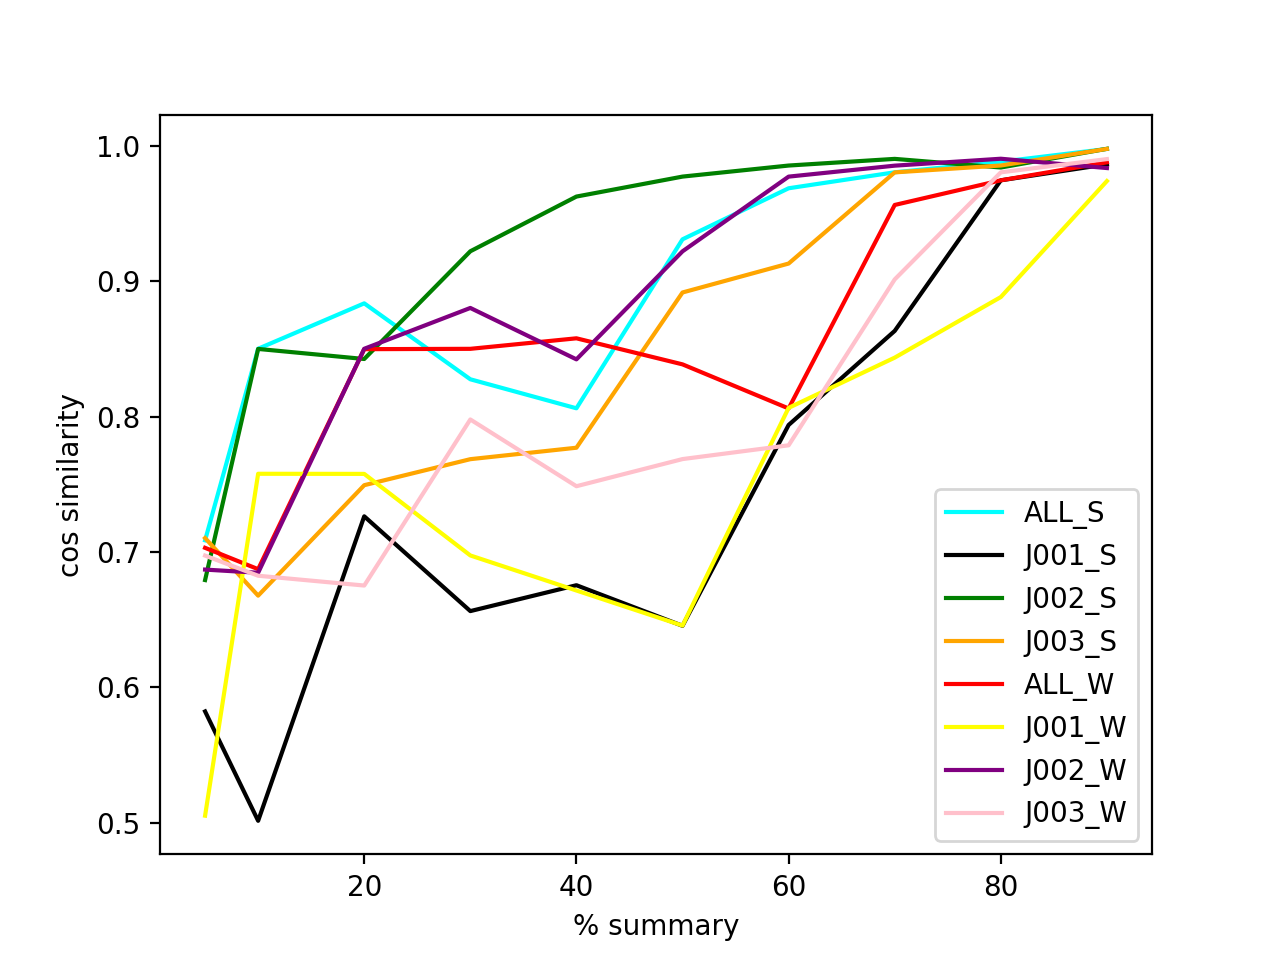

In [91]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

cos_sim0 = ave(y0list)
cos_sim1 = ave(y1list)
cos_sim2 = ave(y2list)
cos_sim3 = ave(y3list)
cos_sim4 = ave(y4list)
cos_sim5 = ave(y5list)
cos_sim6 = ave(y6list)
cos_sim7 = ave(y7list)
    
    
# print(cos_sim0)
    
# print(summary_topic_porb_cal_coss)
# print(judge_topic_list_cal_coss)
    
x=[5,10,20,30,40,50,60,70,80,90]
plt.figure()
plt.plot(x, cos_sim0, label ="ALL_S", color="#00FFFF")
plt.plot(x, cos_sim1, label ="J001_S", color="#000000")
plt.plot(x, cos_sim2, label ="J002_S", color="#008000")
plt.plot(x, cos_sim3, label ="J003_S", color="#FFA500")
plt.plot(x, cos_sim4, label ="ALL_W", color="#FF0000")
plt.plot(x, cos_sim5, label ="J001_W", color="#FFFF00")
plt.plot(x, cos_sim6, label ="J002_W", color="#800080")
plt.plot(x, cos_sim7, label ="J003_W", color="#FFC0CB")
plt.xlabel("% summary")
plt.ylabel("cos similarity")
plt.legend() 